# `merge_too_small`

As we've seen, there are several algorithms which leave "stranded", isolated pixels ungrouped, or grouped at the end into small, irrelevant groups.

The `merge_too_small` script reassigns those groups to a neighboring group.  Technically this violates the rules used 
to establish the groups, which is why it is a separate script and step in the processing.

"too_small" is defined as either

- `method=area` the number of pixels in the group is below `minvalue`
- `method=counts` the number of counts in the `imgfile` in the group is less than `minvalue`.

`merge_too_small` always reassigns to the adjoining group with the most counts or largest area.


In [2]:
ciaover 
echo Today is `date`

CIAO 4.11 Wednesday, December  5, 2018
  bindir      : /export/ciao-4.11/bin
  CALDB       : 4.8.2
Today is Sun Jan 20 15:35:50 EST 2019


In [3]:
# Routine to display images using ds9 in notebook
display_map()
{
img=$1
map=$2
png=$3
reg=$4

if test x${reg} == x
then
  region=""
else
  region="-region $reg"
fi

ds9 -geom 1550x824 -scale asinh -scale limits 0 200 \
  -zoom 2 -cmap load sunset-in-atlantis.sao  \
  -view info no -view panner no -view magnifier no -view buttons no -view colorbar no \
  $img \
  -frame new -cmap load $ASCDS_INSTALL/contrib/data/16_ramps.lut \
  $map -scale linear -scale mode minmax \
  $region -regions select all -regions color black -regions select none \
  -tile yes \
  -saveimage png $png -exit 

display < $png
}

In [4]:
#/bin/rm -rf ./tmp
#mkdir ./tmp
ASCDS_WORK_PATH=`pwd`/tmp

## Example: area too small

We saw in the `pathfinder` example a situation where the grouped contained very few pixels.

We'll use the `merge_too_small` script to merge those smaller contours onto the largest adjoining group.


In [5]:
merge_too_small pathfinder.map pathfinder_min20px.map method=area minval=20  clob+ verb=1 mode=h


merge_too_small
          infile = pathfinder.map
         outfile = pathfinder_min20px.map
          method = area
         imgfile = 
          binimg = 
        minvalue = 20
         verbose = 1
         clobber = yes
            mode = h

Working on mask_id 963 with value 2
Working on mask_id 1019 with value 2
Working on mask_id 787 with value 3
Working on mask_id 959 with value 3
Working on mask_id 1140 with value 3
Working on mask_id 439 with value 4
Working on mask_id 547 with value 4
Working on mask_id 583 with value 4
Working on mask_id 680 with value 4
Working on mask_id 696 with value 4
Working on mask_id 852 with value 4
Working on mask_id 931 with value 4
Working on mask_id 992 with value 4
Working on mask_id 269 with value 5
Working on mask_id 273 with value 5
Working on mask_id 468 with value 5
Working on mask_id 509 with value 5
Working on mask_id 531 with value 5
Working on mask_id 612 with value 5
Working on mask_id 622 with value 5
Working on mask_id 792 with value 

Working on mask_id 652 with value 16
Working on mask_id 767 with value 16
Working on mask_id 776 with value 16
Working on mask_id 822 with value 16
Working on mask_id 934 with value 16
Working on mask_id 1110 with value 16
Working on mask_id 262 with value 17
Working on mask_id 333 with value 17
Working on mask_id 377 with value 17
Working on mask_id 450 with value 17
Working on mask_id 469 with value 17
Working on mask_id 473 with value 17
Working on mask_id 480 with value 17
Working on mask_id 606 with value 17
Working on mask_id 658 with value 17
Working on mask_id 681 with value 17
Working on mask_id 766 with value 17
Working on mask_id 777 with value 17
Working on mask_id 944 with value 17
Working on mask_id 1005 with value 17
Working on mask_id 1118 with value 17
Working on mask_id 1171 with value 17
Working on mask_id 128 with value 18
Working on mask_id 287 with value 18
Working on mask_id 375 with value 18
Working on mask_id 419 with value 18
Working on mask_id 423 with value 

In [6]:
dmimgcalc pathfinder_min20px.map pathfinder.map pathfinder.diff.map sub clob+

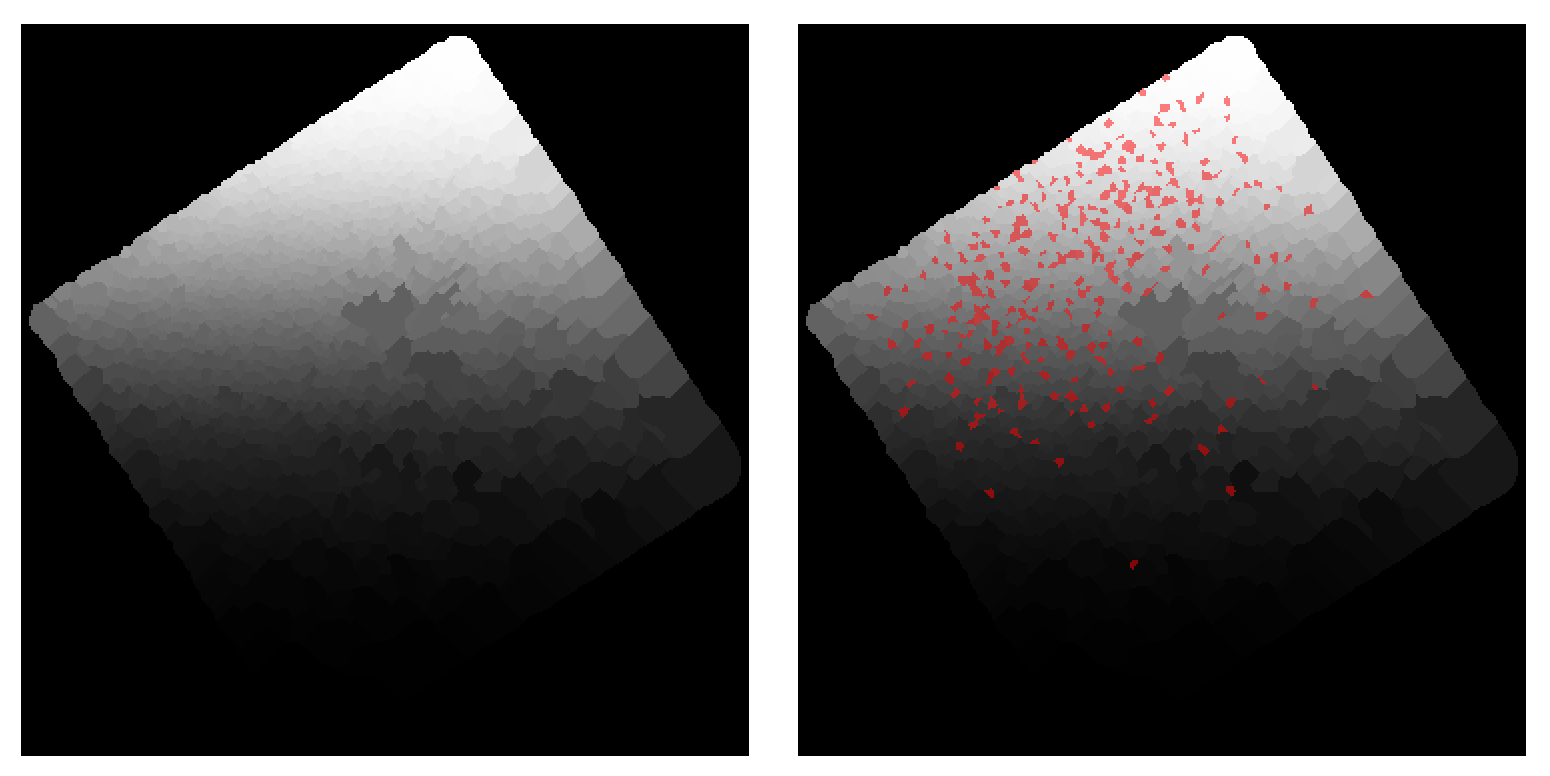

In [7]:
ds9 -geom 1550x824 -zoom 2 \
  -view info no -view panner no -view magnifier no -view buttons no -view colorbar no \
  pathfinder.map pathfinder_min20px.map  \
  -tile yes \
  -mask transparency 50 -mask color red \
  -mask pathfinder.diff.map \
  -saveimage png p_small_area.png -exit

display < p_small_area.png

Left is the original output from `pathfinder`, Right is after adjusting the grouping to have a min of 20 pixels in each group.  The diff is shaded in red.

## Example 2 : min counts

In [8]:
merge_too_small pathfinder_min20px.map pathfinder_min20px_min300cts.map \
  method=counts imgfile=img.fits binimg=pathfinder_min20px_min300cts.img minval=300 verb=1 clob+


merge_too_small
          infile = pathfinder_min20px.map
         outfile = pathfinder_min20px_min300cts.map
          method = counts
         imgfile = img.fits
          binimg = pathfinder_min20px_min300cts.img
        minvalue = 300
         verbose = 1
         clobber = yes
            mode = ql

Working on mask_id 781 with value 21
Working on mask_id 877 with value 21
Working on mask_id 589 with value 22
Working on mask_id 917 with value 22
Working on mask_id 1034 with value 22
Working on mask_id 210 with value 37
Working on mask_id 574 with value 41
Working on mask_id 1073 with value 44
Working on mask_id 702 with value 47
Working on mask_id 1001 with value 47
Working on mask_id 285 with value 48
Working on mask_id 1141 with value 49
Working on mask_id 516 with value 50
Working on mask_id 336 with value 51
Working on mask_id 1183 with value 51
Working on mask_id 616 with value 52
Working on mask_id 1173 with value 53
Working on mask_id 394 with value 56
Working on mask_id 578

Working on mask_id 1022 with value 173
Working on mask_id 937 with value 174
Working on mask_id 145 with value 176
Working on mask_id 223 with value 176
Working on mask_id 1168 with value 176
Working on mask_id 869 with value 177
Working on mask_id 975 with value 177
Working on mask_id 1036 with value 177
Working on mask_id 648 with value 178
Working on mask_id 737 with value 178
Working on mask_id 105 with value 179
Working on mask_id 190 with value 179
Working on mask_id 133 with value 180
Working on mask_id 474 with value 180
Working on mask_id 1148 with value 181
Working on mask_id 116 with value 182
Working on mask_id 748 with value 182
Working on mask_id 1026 with value 182
Working on mask_id 163 with value 183
Working on mask_id 482 with value 183
Working on mask_id 530 with value 183
Working on mask_id 953 with value 183
Working on mask_id 490 with value 184
Working on mask_id 645 with value 184
Working on mask_id 90 with value 185
Working on mask_id 1071 with value 185
Working

In [9]:
dmimgcalc pathfinder_min20px.map pathfinder_min20px_min300cts.map pathfinder.diff2.map sub clob+

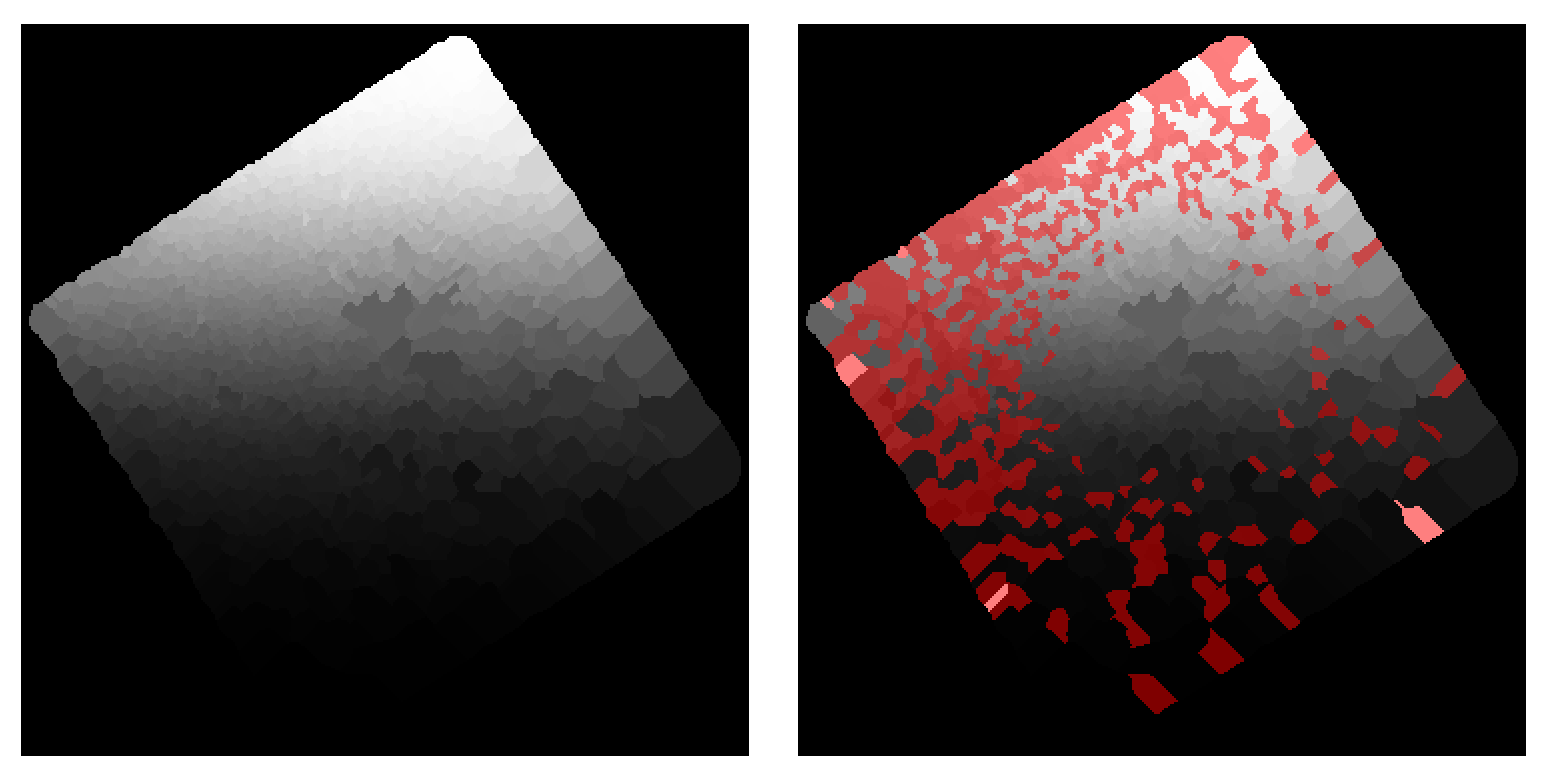

In [10]:
ds9 -geom 1550x824 -zoom 2 \
  -view info no -view panner no -view magnifier no -view buttons no -view colorbar no \
  pathfinder_min20px.map  pathfinder_min20px_min300cts.map \
  -tile yes \
  -mask transparency 50 -mask color red \
  -mask pathfinder.diff2.map \
  -saveimage png p_small_counts.png -exit

display < p_small_counts.png

In [11]:
map2reg pathfinder_min20px_min300cts.map pathfinder_min20px_min300cts.reg

map2reg
          infile = pathfinder_min20px_min300cts.map
         outfile = pathfinder_min20px_min300cts.reg
         verbose = 1
         clobber = no
            mode = ql

1
236
499
811
500
237
813
2
240
501
815
3
242
506
817
5
244
511
823
6
245
512
827
7
247
513
828
8
248
514
831
10
251
517
832
11
252
519
833
12
524
253
834
15
527
256
837
16
532
257
840
17
258
533
842
18
260
538
21
847
261
539
22
851
263
540
24
853
265
541
27
854
266
542
28
859
268
544
30
860
270
548
33
862
274
551
34
867
275
552
35
868
278
556
36
874
281
558
37
876
282
561
38
879
288
566
40
880
289
572
41
882
290
573
45
885
291
575
46
886
292
576
47
888
293
577
51
890
294
585
53
891
299
586
55
892
302
587
56
896
303
588
58
898
595
305
59
900
597
306
60
901
598
307
61
904
310
599
64
905
600
311
66
908
602
67
313
910
607
314
69
912
608
315
72
913
609
318
73
914
611
319
78
915
613
320
79
923
614
321
80
924
615
327
81
925
621
329
933
82
623
330
83
935
624
331
84
939
625
332
941
86
629
334
87
945
630
335
88
947
633


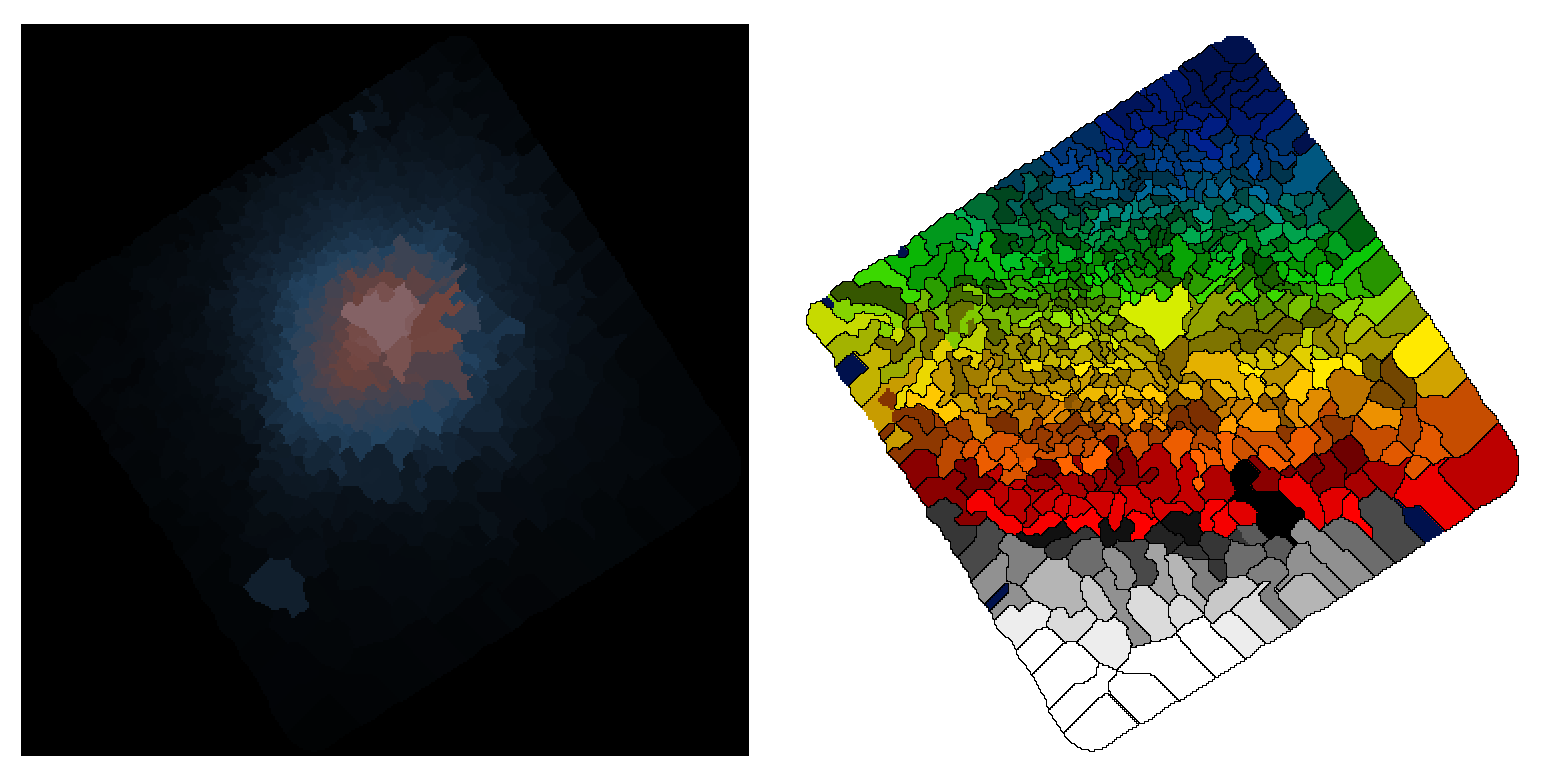

In [12]:
display_map pathfinder_min20px_min300cts.img pathfinder_min20px_min300cts.map pathfinder_min20px_min300cts.png pathfinder_min20px_min300cts.reg